# PYTHON CODE SAMPLE PART 2 - EXPLORATORY DATA ANLYSIS

In this part I will use Lipinski descriptors to explore the difference of druglikeness between compounds and I will perform exploratory data analysis based on those descriptors.

In this part conda and drkit packages are needed.

In [ ]:
#! wget https://raw.githubusercontent.com/Baksic-Ivan/Python_template-Computational_Drug_Discovery/main/EGFR_bioactivity_data_curated.csv

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('EGFR_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.00,active
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.00,active
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.00,intermediate
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.00,inactive
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.00,inactive
...,...,...,...,...
9013,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,20.00,active
9014,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,4.59,active
9015,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00,active
9016,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00,active


I split the elements of canonical_smiles into a list based on period('.') separator since period represents disconnections in SMILES format. Next, I took the longest structure after splitting and asigned it to the belonging molecule. This way only the longest SMILES will be used in Lipinski descriptor calculation.

In [6]:
df_no_smiles = df.drop(columns = 'canonical_smiles')
smiles = []

for i in df.canonical_smiles.tolist():
    single_smile = str(i).split('.')
    longest_smile = max(single_smile, key = len)
    smiles.append(longest_smile)

smiles = pd.Series(smiles, name = 'canonical_smiles')

df_longest_smiles = pd.concat([df_no_smiles, smiles], axis=1)
df_longest_smiles


,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL68920,41.00,active,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
1,CHEMBL69960,170.00,active,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
2,CHEMBL137635,9300.00,intermediate,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12
3,CHEMBL306988,500000.00,inactive,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1
4,CHEMBL66879,3000000.00,inactive,O=C(O)/C=C/c1ccc(O)cc1
...,...,...,...,...
9013,CHEMBL4520788,20.00,active,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...
9014,CHEMBL1800685,4.59,active,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...
9015,CHEMBL4088216,1000.00,active,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...
9016,CHEMBL4549667,1000.00,active,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...


## Lipinski descriptors calculation
I used a set of rule-of-thumb evaluations called Lipinski decriptors in order to explore the difference of druglikeness between active and inactive compounds.

In [7]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [13]:
def lipinski(smiles, verbose = False):
    rows = []
    
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        rows.append([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(rows, columns = columnNames)

    return descriptors




In [14]:
df_lipinski = lipinski(df_longest_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3,4
1,482.903,3.61432,3,6
2,369.432,4.77200,1,6
3,283.287,2.31056,2,4
4,164.160,1.49000,2,2
...,...,...,...,...
9013,448.592,5.57642,2,7
9014,475.510,7.35780,2,2
9015,402.454,2.35370,0,5
9016,481.350,3.11620,0,5


In [42]:
df_combined = pd.concat([df, df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.00,active,383.814,4.45034,3,4
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.00,active,482.903,3.61432,3,6
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.00,intermediate,369.432,4.77200,1,6
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.00,inactive,283.287,2.31056,2,4
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.00,inactive,164.160,1.49000,2,2
...,...,...,...,...,...,...,...,...
9013,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,20.00,active,448.592,5.57642,2,7
9014,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,4.59,active,475.510,7.35780,2,2
9015,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00,active,402.454,2.35370,0,5
9016,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00,active,481.350,3.11620,0,5


## Converting IC50 to pIC50


Plotting IC50

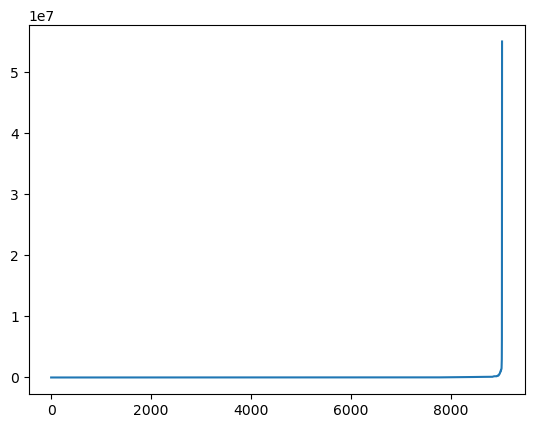

In [48]:
import matplotlib.pyplot as plt
plt.plot(df_combined.index, sorted(df_combined.standard_value))

From the plot above we can see that IC50 value grows exponentially, therefore I converted IC50 to pIC 50 to make it more linear.

Since this dataset did not contain any IC50 values greated than 100,000,000, I skipped the normalization process.

In [45]:
df_combined.standard_value.describe()

count    9.018000e+03
mean     3.052123e+04
std      6.791141e+05
min      3.000000e-03
25%      3.300000e+01
50%      3.600000e+02
75%      6.700000e+03
max      5.500000e+07
Name: standard_value, dtype: float64

But in the case there were any, I would converted IC50 values greater than 100,000,000 to 100,000,000 since future conversion from nM values to M values would turn positive logarithmic value to negative using the following code:

In [38]:
# data normalization
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

import numpy as np

# pIC50 conversion on normalised data
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [46]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        # convert nM to M
        molar = i*(10**-9) 
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', 1)
        
    return x

In [47]:

df_final = pIC50(df_combined)
df_final

/tmp/ipykernel_4818/712163619.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3,4,7.387216
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3,6,6.769551
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,369.432,4.77200,1,6,5.031517
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.287,2.31056,2,4,3.301030
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.160,1.49000,2,2,2.522879
...,...,...,...,...,...,...,...,...
9013,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,active,448.592,5.57642,2,7,7.698970
9014,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,active,475.510,7.35780,2,2,8.338187
9015,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0,5,6.000000
9016,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0,5,6.000000


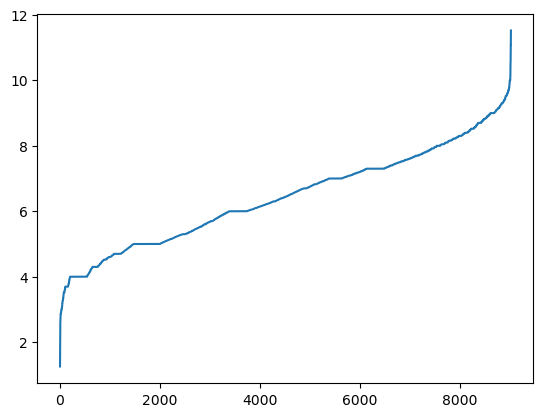

In [49]:
plt.plot(df_final.index, sorted(df_final.pIC50))

In [50]:
df_final.to_csv('EGFR_bioactivity_data_3class_pIC50.csv')

Finally, I removed 'intermediate' bioactivity class values.

In [51]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3,4,7.387216
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3,6,6.769551
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.287,2.31056,2,4,3.301030
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.160,1.49000,2,2,2.522879
5,CHEMBL77085,N#CC(C#N)=Cc1cc(O)ccc1[N+](=O)[O-],inactive,215.168,1.73096,1,5,4.017729
...,...,...,...,...,...,...,...,...
9013,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,active,448.592,5.57642,2,7,7.698970
9014,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,active,475.510,7.35780,2,2,8.338187
9015,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0,5,6.000000
9016,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0,5,6.000000


In [52]:
df_2class.to_csv('EGFR_bioactivity_data_2class_pIC50.csv', index = False)

## Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors


In [54]:
import seaborn as sns
sns.set(style='ticks')

## Frequency plot of the 2 bioactivity classes

Text(0, 0.5, 'Frequency')

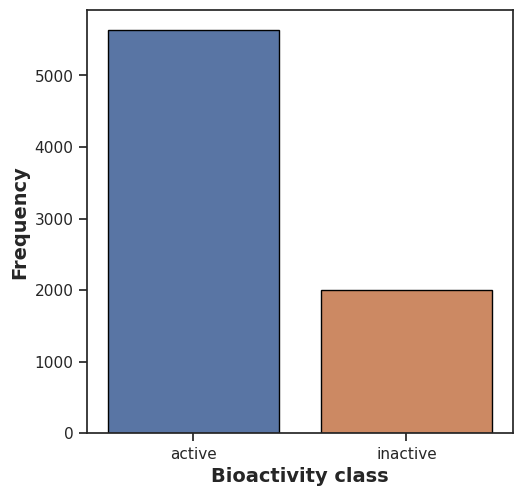

In [55]:
plt.figure(figsize = (5.5, 5.5))

sns.countplot(x = 'class', data=df_2class, edgecolor = 'black')

plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')

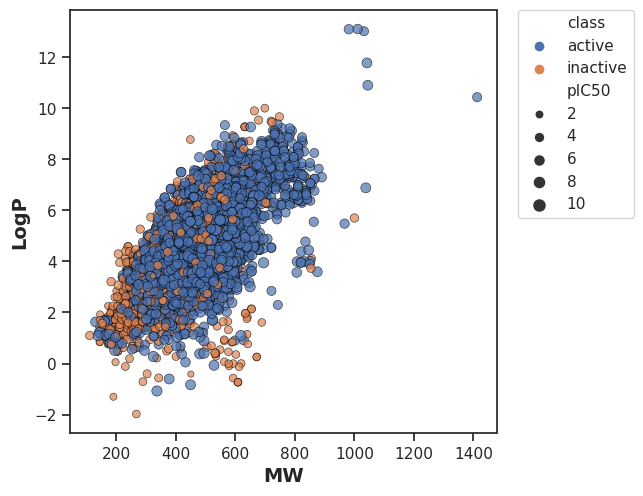

In [56]:
plt.figure(figsize = (5.5, 5.5))

sns.scatterplot(x = 'MW', y = 'LogP', data = df_2class, hue = 'class', size = 'pIC50', edgecolor = 'black', alpha = 0.7)

plt.xlabel('MW', fontsize = 14, fontweight = 'bold')
plt.ylabel('LogP', fontsize = 14, fontweight = 'bold')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

## BOX PLOTS

In [67]:
def my_boxplot(data_frame, descriptor, verbose = False):
    plt.figure(figsize = (5.5, 5.5))
    
    sns.boxplot(x = 'class', y = descriptor, data = data_frame)

    plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
    plt.ylabel(descriptor+' value', fontsize = 14, fontweight = 'bold')
    


## pIC50 value

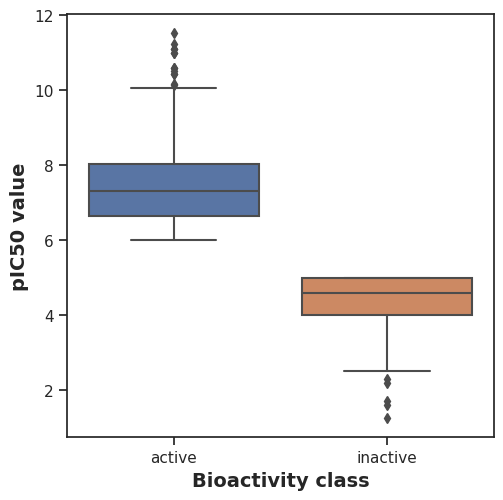

In [69]:
my_boxplot(df_2class, 'pIC50')

Statistical analysis by Mann-Whitney U Test

In [65]:
def mannwhitney(data_frame, descriptor, verbose = False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

  active = data_frame.loc[data_frame['class'] == 'active', descriptor]
  inactive = data_frame.loc[data_frame['class'] == 'inactive', descriptor]

  stat, p = mannwhitneyu(active, inactive)

# interpretation
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])

  return results



In [66]:
mannwhitney(df_2class, 'pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,11257089.0,0.0,0.05,Different distribution (reject H0)


## MW value

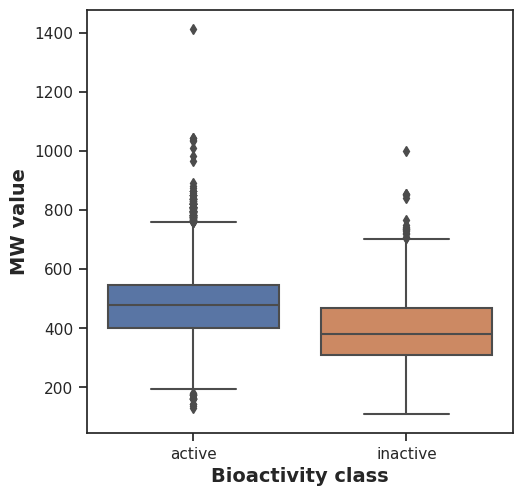

In [70]:
my_boxplot(df_2class, 'MW')

In [71]:
mannwhitney(df_2class, 'MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,8028989.5,5.653377e-177,0.05,Different distribution (reject H0)


## LogP value

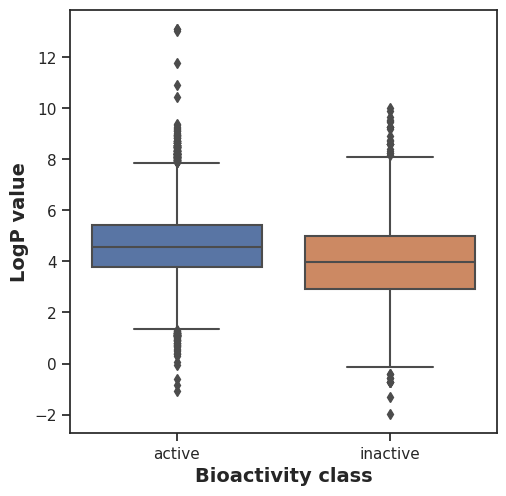

In [72]:
my_boxplot(df_2class, 'LogP')

In [73]:
mannwhitney(df_2class, 'LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,7057124.5,6.293608e-64,0.05,Different distribution (reject H0)


## NumHDonors value

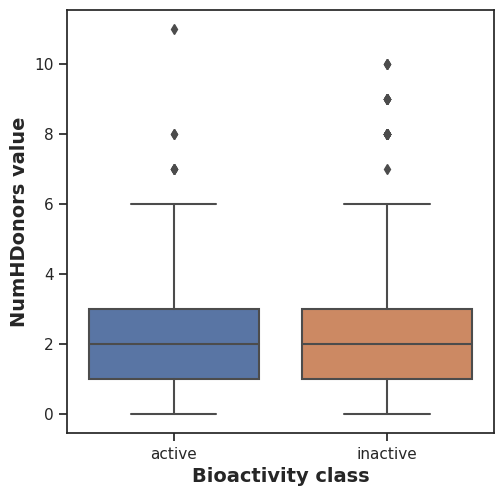

In [74]:
my_boxplot(df_2class, 'NumHDonors')

In [75]:
mannwhitney(df_2class, 'NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,6195684.0,1.585587e-12,0.05,Different distribution (reject H0)


## NumHAcceptors value

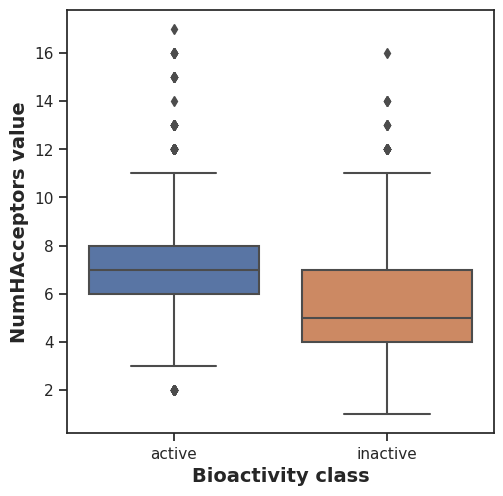

In [76]:
my_boxplot(df_2class, 'NumHAcceptors')

In [77]:
mannwhitney(df_2class, 'NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,7830320.5,2.437614e-152,0.05,Different distribution (reject H0)


## Results interpretation

### Box Plots
#### pIC50
I was expecting for pIC50 anctive and inactive values to be significantly different since I exluded 'intermediate' values
#### Lipinski's descriptors
All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.